In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
import RisolviSis
import scipy.linalg as spl
from scipy.io import loadmat as lm

## Matrice 1

In [88]:
dati = lm("Matrici test su cui esercitarsi-20230610/test10.mat")
A = dati["A"]
b = dati["b"]

True


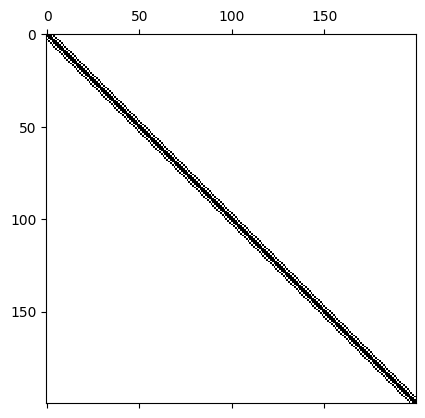

In [89]:
A.shape  # Controllo la dimensione della matrice e quindi se m = n
plt.spy(A)  # Controllo se è densa o sparsa
np.array_equal(A, A.T)  # Controllo che sia simmetrica
print(np.min(npl.eigvals(A)) > 0)  # Controllo che sia definita positiva

In [90]:
# Gauss Seidel
def gauss_seidel(A, b, x0, toll, it_max):
    errore = 1000

    D = np.diag(np.diag(A))
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    M = D + E
    N = -F
    T = np.dot(npl.inv(M), N)

    raggiospettrale = np.max(np.abs(npl.eigvals(T)))
    print("raggio spettrale Gauss-Seidel ", raggiospettrale)
    it = 0
    er_vet = []
    while it <= it_max and errore >= toll:
        x, flag = RisolviSis.Lsolve(M, b - np.dot(F, x0))
        errore = npl.norm(x - x0) / npl.norm(x)
        er_vet.append(errore)
        x0 = x.copy()
        it = it + 1
    return x, it, er_vet

In [91]:
# Gauss Seidel SOR
def gauss_seidel_sor(A, b, x0, toll, it_max, omega):
    errore = 1000

    D = np.diag(np.diag(A))
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    # Calcolo della matrice di iterazione di Gassu_Seidel SOR
    Momega = D + omega * E
    Nomega = (1 - omega) * D - omega * F
    T = np.dot(npl.inv(Momega), Nomega)

    raggiospettrale = np.max(np.abs(npl.eigvals(T)))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    M = D + E
    N = -F
    it = 0
    xold = x0.copy()
    xnew = x0.copy()
    er_vet = []
    while it <= it_max and errore >= toll:
        xtilde, flag = RisolviSis.Lsolve(M, b - np.dot(F, xold))
        xnew = (1 - omega) * xold + omega * xtilde
        errore = npl.norm(xnew - xold) / npl.norm(xnew)
        er_vet.append(errore)
        xold = xnew.copy()
        it = it + 1
    return xnew, it, er_vet

In [92]:
# Steepest Descent
def steepestdescent(A, b, x0, itmax, tol):
    # inizializzare le variabili necessarie
    x = x0
    r = np.dot(A, x) - b
    p = -r
    it = 0
    nb = npl.norm(b)
    errore = npl.norm(r) / nb
    vec_sol = []
    vec_sol.append(x)
    vet_r = []
    vet_r.append(errore)

    # utilizzare il metodo del gradiente per trovare la soluzione
    while it <= itmax and errore >= tol:
        it = it + 1
        Ap = A @ p
        rTr = r.T @ r
        alpha = rTr / np.dot(p.T, Ap)
        x = x + alpha * p
        vec_sol.append(x)
        r = r + alpha * Ap
        errore = npl.norm(r) / nb
        vet_r.append(errore)
        p = -r

    return x, vet_r, vec_sol, it

In [93]:
# Gradiente Coniugato
def conjugate_gradient(A, b, x0, itmax, tol):
    # inizializzare le variabili necessarie
    x = x0
    r = np.dot(A, x) - b
    p = -r
    it = 0
    nb = npl.norm(b)
    errore = npl.norm(r) / nb
    vec_sol = []
    vec_sol.append(x0)
    vet_r = []
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per trovare la soluzione
    while it < itmax and errore >= tol:
        it = it + 1
        Ap = A @ p
        rtr = r.T @ r
        alpha = rtr / np.dot(p.T, Ap)
        x = x + alpha * p
        vec_sol.append(x)
        r = r + alpha * Ap
        gamma = np.dot(r.T, r) / rtr
        errore = npl.norm(r) / nb
        vet_r.append(errore)
        p = -r + gamma * p

    return x, vet_r, vec_sol, it

In [94]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
toll = 1e-8
it_max = 100
x, it, er_vet = gauss_seidel(A, b, x0, toll, it_max)

raggio spettrale Gauss-Seidel  0.6323844622504119


In [95]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
toll = 1e-16
it_max = 1000
omega = 1.585
xnew, it, er_vet = gauss_seidel_sor(A, b, x0, toll, it_max, omega)

raggio spettrale Gauss-Seidel SOR  0.7021066008068587


In [96]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
tol = 1e-16
itmax = 1000
x, vet_r, vec_sol, it = steepestdescent(A, b, x0, itmax, tol)

In [97]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
tol = 1e-16
itmax = 1000
x,vet_r,vec_sol,it = conjugate_gradient(A, b, x0, itmax, tol)

In [98]:
# Usare il gradiente coniugato perché più efficiente

## Matrice 2

In [3]:
dati = lm("Matrici test su cui esercitarsi-20230610/test11.mat")
A = dati["A"]
b = dati["b"]

True


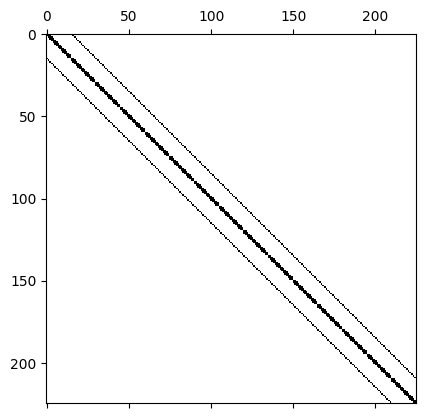

In [4]:
A.shape
plt.spy(A)
np.array_equal(A, A.T)
print(np.min(npl.eigvals(A)) > 0)

In [10]:
def conjugate_gradient(A, b, x0, itmax, tol):
    # inizializzare le variabili necessarie
    x = x0
    r = np.dot(A, x) - b
    p = -r
    it = 0
    nb = npl.norm(b)
    errore = npl.norm(r) / nb
    vec_sol = []
    vec_sol.append(x)
    vet_r = []
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per trovare la soluzione
    while errore > toll and it < itmax:
        it = it + 1
        Ap = A @ p
        rtr = r.T @ r
        alpha = rtr / np.dot(p.T, Ap)
        x = x + alpha * p
        vec_sol.append(x)
        r = r + alpha * Ap
        gamma = np.dot(r.T, r) / rtr
        errore = npl.norm(r) / nb
        vet_r.append(errore)
        p = -r + gamma * p

    return x, vet_r, vec_sol, it

In [11]:
n = A.shape[0]
x0 = np.zeros(A.shape[0]).reshape(n, 1)
tol = 1e-16
itmax = 1000
x,vet_r,vec_sol,it = conjugate_gradient(A, b, x0, itmax, tol)
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

## Matrice 3

In [100]:
dati = lm("Matrici test su cui esercitarsi-20230610/test13.mat")
A = dati["A"]
b = dati["b"]

In [101]:
A.shape
npl.matrix_rank(A) == np.min(A.shape)  # Controllo se ha rango massimo
npl.cond(A)  # Controllo il condizionamento: in questo caso è ben condizionata

9.999999999999991

In [102]:
# Equazioni Normali
def eqnorm(A, b):
    # Soluzione di un sistema sovradeterminato facendo uso delle equazioni normali
    G = A.T @ A
    f = A.T @ b
    L = spl.cholesky(G, lower=True)
    y, flag = RisolviSis.Lsolve(L, f)  # Provo prima con Lsolve se il flag è 0 uso Usolve
    if flag == 0:
        x, flag = RisolviSis.Usolve(L.T, y)
    return x

In [103]:
x = eqnorm(A, b)

## Matrice 4

In [104]:
dati = lm("Matrici test su cui esercitarsi-20230610/test14.mat")
A = dati["A"]
b = dati["b"]

In [105]:
A.shape
npl.matrix_rank(A) == np.min(A.shape)
npl.cond(A)

2.286850858750283e+16

In [106]:
# SVDLS
# Soluzione di un sistema sovradeterminato facendo uso della fattorizzazione SVD
def SVDLS(A, b):
    # Calcola la fattorizzazione SVD di A e utilizzala per calcolare
    # la soluzione nel senso dei minimi quadrati di Ax=b
    U, s, VT = spl.svd(A)
    V = VT.T
    k = np.count_nonzero(s)
    d = U.T @ b
    d1 = d[:k].reshape(A.shape[1], 1)
    s1 = s.reshape(A.shape[1], 1)
    # Risolve il sistema diagonale di dimensione kxk avente come matrice dei coefficienti la matrice Sigma
    c = d1[:k] / s1[:k]
    x = V[:, :k] @ c
    residuo = npl.norm(d[k:]) ** 2
    return x, residuo

In [107]:
x, residuo = SVDLS(A, b)

## Matrice 5

In [108]:
dati = lm("Matrici test su cui esercitarsi-20230610/test15.mat")
A = dati["A"]
b = dati["b"]

In [109]:
A.shape
npl.matrix_rank(A) == np.min(A.shape)
npl.cond(A)

1000.0000000000001

In [110]:
# QRLS
# Soluzione di un sistema sovradeterminato facendo uso della fattorizzazione QR
def qrLS(A, b):
    n = A.shape[1]  # numero di colonne di A
    # Calcola la fattorizzazione QR di A e utilizzala per calcolare
    # la soluzione nel senso dei minimi quadrati di Ax=b
    Q, R = spl.qr(A)
    h = Q.T @ b
    x, flag = RisolviSis.Usolve(R[0:n, :], h[0:n])
    residuo = npl.norm(h[n:]) ** 2
    return x, residuo

In [111]:
x, residuo = qrLS(A, b)